Referencia para DataSet https://archive.ics.uci.edu/ml/datasets/Adult

In [1]:
#Biblioteca utilizadas 
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb


from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import svm

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

/home/felipe/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


A extração foi feita por Barry Becker, do banco de dados do Censo de 1994. Um conjunto de registros razoavelmente limpos foi extraído usando as seguintes condições: ((AAGE> 16) && (AGI> 100) && (AFNLWGT> 1) && (HRSWK> 0))

Tarefa de predição é determinar se uma pessoa ganha mais de 50K por ano

Importando valores da Adult.csv pata amostragem e classificando.



In [2]:
data= pd.read_csv('Adult.csv')
data.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss', 'hours-per-week', 'native-country', 'target']
df= pd.DataFrame(data)

In [3]:
data.head(200)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


Algumas categorias possuiem valores nulos, com a string = '?'. Então troquei as string  para valores numericos 

In [4]:
#Converting Categorical variables into Quantitative variables
print(set(data['occupation']))
data['occupation'] = data['occupation'].map({' ?': 0, ' Farming-fishing': 1, ' Tech-support': 2,' Adm-clerical': 3, ' Handlers-cleaners': 4, ' Prof-specialty': 5,' Machine-op-inspct': 6, ' Exec-managerial': 7,' Priv-house-serv': 8, ' Craft-repair': 9, ' Sales': 10,' Transport-moving': 11, ' Armed-Forces': 12, ' Other-service': 13, ' Protective-serv': 14}).astype(int)
print(set(data['occupation']))

{' Sales', ' Prof-specialty', ' Tech-support', ' Exec-managerial', ' Handlers-cleaners', ' Priv-house-serv', ' Machine-op-inspct', ' Armed-Forces', ' Transport-moving', ' Farming-fishing', ' Craft-repair', ' ?', ' Adm-clerical', ' Other-service', ' Protective-serv'}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}


In [5]:
print(set(data['target']))
data['target'] = data['target'].map({' <=50K': 0, ' >50K': 1}).astype(int)
print(set(data['target']))


{' >50K', ' <=50K'}
{0, 1}


In [6]:
print(set(data['sex']))
data['sex'] = data['sex'].map({' Male': 0, ' Female': 1}).astype(int)
print(set(data['sex']))

{' Male', ' Female'}
{0, 1}


In [7]:
print(set(data['race']))
data['race'] = data['race'].map({' Black': 0, ' Asian-Pac-Islander': 1, ' Other': 2, ' White': 3, ' Amer-Indian-Eskimo': 4}).astype(int)
print(set(data['race']))

{' Asian-Pac-Islander', ' Black', ' Amer-Indian-Eskimo', ' White', ' Other'}
{0, 1, 2, 3, 4}


In [8]:
print(set(data['marital-status']))
data['marital-status'] = data['marital-status'].map({' Married-spouse-absent': 0, ' Widowed': 1,' Married-civ-spouse': 2, ' Separated': 3, ' Divorced': 4,' Never-married': 5, ' Married-AF-spouse': 6}).astype(int)
print(set(data['marital-status']))

{' Married-AF-spouse', ' Widowed', ' Never-married', ' Married-civ-spouse', ' Married-spouse-absent', ' Separated', ' Divorced'}
{0, 1, 2, 3, 4, 5, 6}


In [9]:
print(set(data['workclass']))
data['workclass'] = data['workclass'].map({' Self-emp-not-inc': 0, ' Self-emp-inc': 1,' State-gov': 2, ' Private': 3, ' Never-worked': 4,' Federal-gov': 5, ' ?': 6, ' Local-gov': 7, ' Without-pay': 8}).astype(int)
print(set(data['workclass']))


{' Self-emp-not-inc', ' State-gov', ' Local-gov', ' Federal-gov', ' Never-worked', ' Without-pay', ' ?', ' Self-emp-inc', ' Private'}
{0, 1, 2, 3, 4, 5, 6, 7, 8}


In [10]:
print(set(data['education']))
data['education'] = data['education'].map({' Prof-school': 0, ' 10th': 1,' 1st-4th': 2, ' Masters': 3, ' 7th-8th': 4, ' Doctorate': 5, ' 12th': 6, ' 9th': 7, ' Some-college': 8, ' Preschool': 9, ' 5th-6th': 10, ' Bachelors': 11, ' Assoc-acdm': 12, ' 11th': 13, ' Assoc-voc': 14, ' HS-grad': 15}).astype(int)
print(set(data['education']))

{' Some-college', ' 12th', ' 9th', ' 7th-8th', ' Masters', ' Bachelors', ' Doctorate', ' HS-grad', ' 11th', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' Assoc-voc', ' Assoc-acdm'}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}


Substituindo os valores numericos na tabela sem alterar a original.

In [11]:
df.occupation.replace(0, np.nan, inplace=True)

In [12]:
print(df.shape)
df=df.dropna()
print(df.shape)

(32560, 15)
(30717, 15)


In [13]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,50,0,83311,11,13,2,7.0,Husband,3,0,0,0,13,United-States,0
1,38,3,215646,15,9,4,4.0,Not-in-family,3,0,0,0,40,United-States,0
2,53,3,234721,13,7,2,4.0,Husband,0,0,0,0,40,United-States,0
3,28,3,338409,11,13,2,5.0,Wife,0,1,0,0,40,Cuba,0
4,37,3,284582,3,14,2,7.0,Wife,3,1,0,0,40,United-States,0
5,49,3,160187,7,5,0,13.0,Not-in-family,0,1,0,0,16,Jamaica,0
6,52,0,209642,15,9,2,7.0,Husband,3,0,0,0,45,United-States,1
7,31,3,45781,3,14,5,5.0,Not-in-family,3,1,14084,0,50,United-States,1
8,42,3,159449,11,13,2,7.0,Husband,3,0,5178,0,40,United-States,1
9,37,3,280464,8,10,2,7.0,Husband,0,0,0,0,80,United-States,1


Fazendo comparativos graficos correlacioando entre target x variaveis (occupation, race, sex, matrial-status, education), pois oque eu acredito de seja relevante para saber se a pessoa ganha ou nao mais de 50k

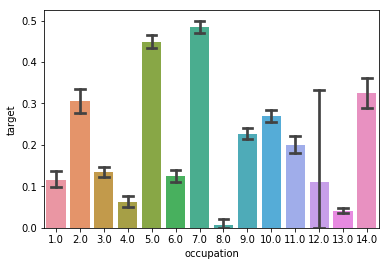

In [14]:
#Grafico comparativo entre Target x Ocupação
sb.barplot(x='occupation', y='target', data=df, capsize=.4)

?: 0, Farming-fishing: 1, Tech-support: 2, Adm-clerical: 3, Handlers-cleaners: 4, Prof-specialty: 5, Machine-op-inspct: 6, Exec-managerial: 7, Priv-house-serv: 8, Craft-repair: 9,Sales: 10, Transport-moving: 11, Armed-Forces: 12, Other-service: 13, Protective-serv: 14

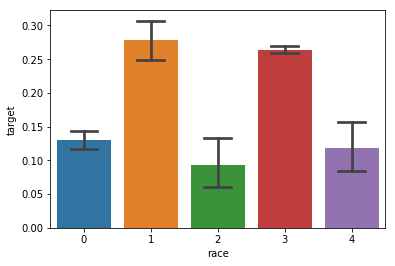

In [15]:
#Grafico comparativo entre Target x Raça
sb.barplot(x='race', y='target', data=df, capsize=.4)

Black: 0,  Asian-Pac-Islander: 1,  Other: 2,  White: 3,  Amer-Indian-Eskimo: 4


As ilhas do Pacífico Asiático(1) e os Brancos(3) são duas raças que têm a maior renda média.

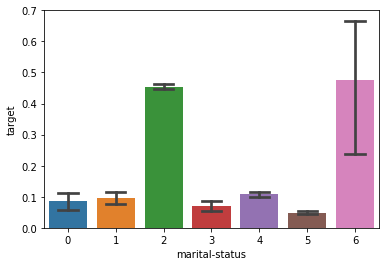

In [16]:
sb.barplot(x='marital-status', y='target', data=df, capsize=.4)

Married-spouse-absent: 0,  Widowed: 1,  Married-civ-spouse: 2,  Separated: 3,   Divorced: 4,  Never-married: 5,   Married-AF-spouse: 6

Cidadãos casados com cônjuge(6) têm maiores chances de ganhar mais do que aqueles que são solteiros, divorciados(4), viúvos(1), separados(3).

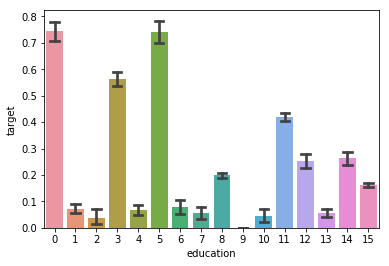

In [17]:
sb.barplot(x='education', y='target', data=df, capsize=.4)

Prof-school: 0, 10th: 1, 1st-4th: 2,  Masters: 3,  7th-8th: 4,  Doctorate: 5,  12th: 6,  9th: 7,  Some-college: 8,  Pre-school: 9,  5th-6th: 10,  Bachelors: 11,  Assoc-acdm: 12,  11th: 13,  Assoc-voc: 14,  HS-grad: 15

Pessoas com Doutorado(5) e Professores de Escola(0)  pode levar a maior renda na maioria dos casos.

Validando independencia entre as variáveis

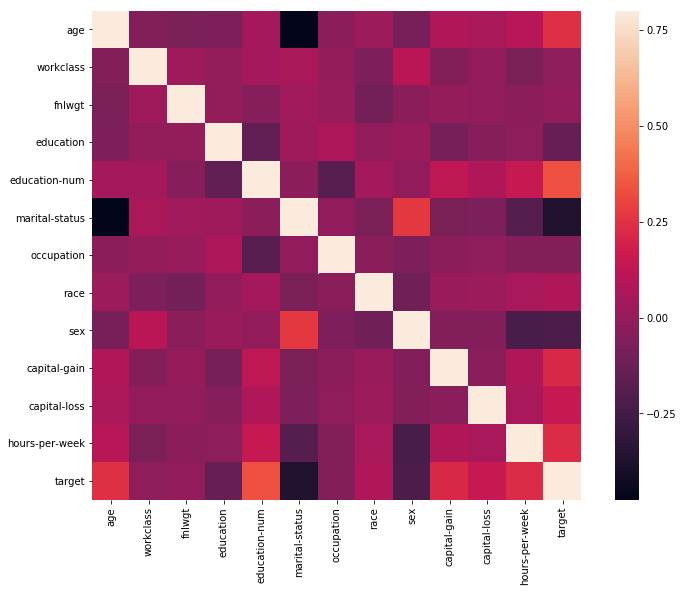

In [18]:
hmap = df.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(hmap, vmax=.8, square=True);

Incluir apenas os atributos correlacionados com o atributo (target). por nao usar um grafico para fazer um comparativo.

In [19]:
df.drop(['workclass', 'fnlwgt', 'education', 'marital-status', 'occupation', 'relationship', 'sex', 'race', 'capital-loss', 'native-country'],axis=1,inplace=True)
df.head()

,age,education-num,capital-gain,hours-per-week,target
0,50,13,0,13,0
1,38,9,0,40,0
2,53,7,0,40,0
3,28,13,0,40,0
4,37,14,0,40,0


Fazendo os treinamento com atributos correlacionados com o atributo target

In [20]:
X=df[['education-num','age','hours-per-week', 'capital-gain']].values
y= df[['target']].values

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.5, random_state=25)

Configurando os modelo de previsão.

Decission Trees

In [21]:
#Tree

Classif_Tree = tree.DecisionTreeClassifier()
Classif_Tree.fit(X_train, y_train)
y_pred = Classif_Tree.predict(X_train)

print(classification_report(y_train, y_pred))

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
predn=clf.predict(X_test)
print('accuracy', metrics.accuracy_score(predn,y_test))



             precision    recall  f1-score   support

          0       0.88      0.97      0.92     11548
          1       0.88      0.59      0.71      3810

avg / total       0.88      0.88      0.87     15358

accuracy 0.7859235627319487


KNN

In [22]:
#KNN
Classif_KNN = KNeighborsClassifier()
Classif_KNN.fit(X_train, y_train)
y_pred = Classif_KNN.predict(X_train)

print(classification_report(y_train, y_pred))

model=KNeighborsClassifier(n_neighbors=78) 
model.fit(X_train,y_train)
prediction=model.predict(X_test)

print('accuracy', metrics.accuracy_score(prediction,y_test))

/home/felipe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


             precision    recall  f1-score   support

          0       0.87      0.93      0.90     11548
          1       0.73      0.57      0.64      3810

avg / total       0.83      0.84      0.83     15358



/home/felipe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


accuracy 0.811771599713523


Progressão Logistica

In [23]:
Classif_RL = LogisticRegression()
Classif_RL.fit(X_train, y_train)
y_pred = Classif_RL.predict(X_train)

print(classification_report(y_train, y_pred))

clf = LogisticRegression()
clf.fit(X_train, y_train)
predn=clf.predict(X_test)
print('accuracy', metrics.accuracy_score(predn,y_test))

/home/felipe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


             precision    recall  f1-score   support

          0       0.81      0.97      0.88     11548
          1       0.77      0.29      0.42      3810

avg / total       0.80      0.80      0.77     15358

accuracy 0.7978384009375611


Setting up a Support Vector Machine (Demora muito pra pocessar)

Uma conclução rapida. Podemos utlizar o KNN por ser um ponto de accuracy  mais elevado contendo 81% de acerto danda a denterminadas variaveis se o Cidadao ganha mais  ou menos de 50k.